Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# # Load the data
# df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

In [3]:
# df_0.head()

In [4]:
df_0_selected_regions = pd.read_csv('data/data file 4/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 4/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 4/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 4/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 4/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 4/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 4/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 4/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 4/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 4/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [5]:
# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 4/data_1_1_der.csv')

Define the Target Variable and Features

In [6]:
# Define the target_v0w variable and feature columns
target_v0w = 'dgp_name'
features_v0w = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

In [7]:
print(features_v0w)

Index(['4644', '4648', '4652', '4656', '4660', '4664', '4668', '4672', '4676',
       '4680',
       ...
       '8240', '8244', '8248', '8252', '8256', '8260', '8264', '8268', '8272',
       '8276'],
      dtype='object', length=243)


RandomForest Classification and Evaluation with LOGO-CV

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.8406982570806101
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.78      0.66      0.72       141
     Group 2       0.71      0.82      0.76       141

    accuracy                           0.74       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.74      0.74      0.74       282

Confusion Matrix:
         Group 1  Group 2
Group 1       93       48
Group 2       26      115
Class: Group 1
precision: 0.7815126050420168
recall: 0.6595744680851063
f1-score: 0.7153846153846154
support: 141.0

Class: Group 2
precision: 0.7055214723926381
recall: 0.8156028368794326
f1-score: 0.756578947368421
support: 141.0

accuracy: 0.7375886524822695

Class: macro avg
precision: 0.7435170387173274
recall: 0.7375886524822695
f1-score: 0.7359817813765182
support: 282.0

Class: weighted avg
precision: 0.7435170387173274
recall: 0.7375

Implementing Different Classifiers on the Smoothed Dataset

In [9]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'dgp_name'
features_v0w = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [10]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'dgp_name'
features_v0w = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.7973425925925927
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.69      0.41      0.52       141
     Group 2       0.58      0.82      0.68       141

    accuracy                           0.61       282
   macro avg       0.64      0.61      0.60       282
weighted avg       0.64      0.61      0.60       282

Confusion Matrix:
         Group 1  Group 2
Group 1       58       83
Group 2       26      115
Class: Group 1
precision: 0.6904761904761905
recall: 0.41134751773049644
f1-score: 0.5155555555555555
support: 141.0

Class: Group 2
precision: 0.5808080808080808
recall: 0.8156028368794326
f1-score: 0.6784660766961652
support: 141.0

accuracy: 0.6134751773049646

Class: macro avg
precision: 0.6356421356421356
recall: 0.6134751773049645
f1-score: 0.5970108161258604
support: 282.0

Class: weighted avg
precision: 0.6356421356421357
recall: 0.61347517730

In [12]:
# Define the target variable and feature columns
target_v0w = 'dgp_name'
features_v0w = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0w]
y = df_smoothed_v0w[target_v0w]
groups = df_smoothed_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.6134751773049646
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.69      0.41      0.52       141
     Group 2       0.58      0.82      0.68       141

    accuracy                           0.61       282
   macro avg       0.64      0.61      0.60       282
weighted avg       0.64      0.61      0.60       282

Confusion Matrix:
         Group 1  Group 2
Group 1       58       83
Group 2       26      115
Class: Group 1
precision: 0.6904761904761905
recall: 0.41134751773049644
f1-score: 0.5155555555555555
support: 141.0

Class: Group 2
precision: 0.5808080808080808
recall: 0.8156028368794326
f1-score: 0.6784660766961652
support: 141.0

accuracy: 0.6134751773049646

Class: macro avg
precision: 0.6356421356421356
recall: 0.6134751773049645
f1-score: 0.5970108161258604
support: 282.0

Class: weighted avg
precision: 0.6356421356421357
recall: 0.61347517730

Random Forest (RF) classifier

In [13]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.7375886524822695
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.78      0.66      0.72       141
     Group 2       0.71      0.82      0.76       141

    accuracy                           0.74       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.74      0.74      0.74       282

Confusion Matrix:
         Group 1  Group 2
Group 1       93       48
Group 2       26      115
Class: Group 1
precision: 0.7815126050420168
recall: 0.6595744680851063
f1-score: 0.7153846153846154
support: 141.0

Class: Group 2
precision: 0.7055214723926381
recall: 0.8156028368794326
f1-score: 0.756578947368421
support: 141.0

accuracy: 0.7375886524822695

Class: macro avg
precision: 0.7435170387173274
recall: 0.7375886524822695
f1-score: 0.7359817813765182
support: 282.0

Class: weighted avg
precision: 0.7435170387173274
recall: 0.737

Extra Trees (ET) classifier

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the smoothed dataset
df_smoothed_v0w = pd.read_csv('data/data file 4/data_1_1_der.csv')

# Define the target variable and feature columns
target_v0u = 'dgp_name'
features_v0u = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.7340425531914894
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.80      0.62      0.70       141
     Group 2       0.69      0.84      0.76       141

    accuracy                           0.73       282
   macro avg       0.75      0.73      0.73       282
weighted avg       0.75      0.73      0.73       282

Confusion Matrix:
         Group 1  Group 2
Group 1       88       53
Group 2       22      119
Class: Group 1
precision: 0.8
recall: 0.624113475177305
f1-score: 0.701195219123506
support: 141.0

Class: Group 2
precision: 0.6918604651162791
recall: 0.8439716312056738
f1-score: 0.7603833865814696
support: 141.0

accuracy: 0.7340425531914894

Class: macro avg
precision: 0.7459302325581396
recall: 0.7340425531914894
f1-score: 0.7307893028524879
support: 282.0

Class: weighted avg
precision: 0.7459302325581395
recall: 0.7340425531914894
f1-s

k-Nearest Neighbors (kNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'dgp_name'
features_v0u = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.6453900709219859
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.77      0.42      0.54       141
     Group 2       0.60      0.87      0.71       141

    accuracy                           0.65       282
   macro avg       0.68      0.65      0.63       282
weighted avg       0.68      0.65      0.63       282

Confusion Matrix:
         Group 1  Group 2
Group 1       59       82
Group 2       18      123
Class: Group 1
precision: 0.7662337662337663
recall: 0.41843971631205673
f1-score: 0.5412844036697247
support: 141.0

Class: Group 2
precision: 0.6
recall: 0.8723404255319149
f1-score: 0.7109826589595376
support: 141.0

accuracy: 0.6453900709219859

Class: macro avg
precision: 0.6831168831168831
recall: 0.6453900709219859
f1-score: 0.6261335313146312
support: 282.0

Class: weighted avg
precision: 0.6831168831168831
recall: 0.6453900709219859
f1-score:

Gradient Boosting Classifier (GBC)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.7695035460992907
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.83      0.67      0.75       141
     Group 2       0.73      0.87      0.79       141

    accuracy                           0.77       282
   macro avg       0.78      0.77      0.77       282
weighted avg       0.78      0.77      0.77       282

Confusion Matrix:
         Group 1  Group 2
Group 1       95       46
Group 2       19      122
Class: Group 1
precision: 0.8333333333333334
recall: 0.6737588652482269
f1-score: 0.7450980392156863
support: 141.0

Class: Group 2
precision: 0.7261904761904762
recall: 0.8652482269503546
f1-score: 0.7896440129449838
support: 141.0

accuracy: 0.7695035460992907

Class: macro avg
precision: 0.7797619047619048
recall: 0.7695035460992907
f1-score: 0.767371026080335
support: 282.0

Class: weighted avg
precision: 0.7797619047619048
recall: 0.7695035460992

LightGBM (LGBM) classifier 

In [17]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 132, number of negative: 141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22179
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 243
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483516 -> initscore=-0.065958
[LightGBM] [Info] Start training from score -0.065958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Linear Discriminant Analysis (LDA) classifier

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.19148936170212766
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.23      0.26      0.24       141
     Group 2       0.15      0.13      0.14       141

    accuracy                           0.19       282
   macro avg       0.19      0.19      0.19       282
weighted avg       0.19      0.19      0.19       282

Confusion Matrix:
         Group 1  Group 2
Group 1       36      105
Group 2      123       18
Class: Group 1
precision: 0.22641509433962265
recall: 0.2553191489361702
f1-score: 0.24
support: 141.0

Class: Group 2
precision: 0.14634146341463414
recall: 0.1276595744680851
f1-score: 0.13636363636363635
support: 141.0

accuracy: 0.19148936170212766

Class: macro avg
precision: 0.18637827887712838
recall: 0.19148936170212766
f1-score: 0.18818181818181817
support: 282.0

Class: weighted avg
precision: 0.18637827887712838
recall: 0.19148936170212766

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred)

# Reverse the predicted classes
y_pred_all_ldar_reversed = [1 - y for y in y_pred_all_ldar]

# Calculate the overall accuracy for the reversed predictions
overall_accuracy_lda_reversed = accuracy_score(y_true_all_ldar, y_pred_all_ldar_reversed)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): {overall_accuracy_lda_reversed}')
print("Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)")
report_lda_logo_reversed = classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar_reversed, target_names=le.classes_))

# Generate and display the confusion matrix for the reversed predictions
cm_logo_lda_reversed = confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed)
df_cm_lda_reversed = pd.DataFrame(cm_logo_lda_reversed, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Reversed Classes):")
print(df_cm_lda_reversed)

# Display the detailed results for the reversed predictions
for class_name, metrics in report_lda_logo_reversed.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy (Reversed Classes): 0.8085106382978723
Leave-One-Group-Out CV LDA Model Classification Report (Reversed Classes)
              precision    recall  f1-score   support

     Group 1       0.85      0.74      0.80       141
     Group 2       0.77      0.87      0.82       141

    accuracy                           0.81       282
   macro avg       0.81      0.81      0.81       282
weighted avg       0.81      0.81      0.81       282

Confusion Matrix (Reversed Classes):
         Group 1  Group 2
Group 1      105       36
Group 2       18      123
Class: Group 1
precision: 0.8536585365853658
recall: 0.7446808510638298
f1-score: 0.7954545454545454
support: 141.0

Class: Group 2
precision: 0.7735849056603774
recall: 0.8723404255319149
f1-score: 0.82
support: 141.0

accuracy: 0.8085106382978723

Class: macro avg
precision: 0.8136217211228716
recall: 0.8085106382978724
f1-score: 0.8077272727272726
support: 282.0

Class: weighted avg
precision

Logistic Regression classifier

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with a different solver
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Flip the predictions
y_pred_lg_flipped = ['Group 1' if pred == 'Group 2' else 'Group 2' for pred in y_pred_all_logreg]

# Generate the classification report for the flipped predictions
report_logreg_flipped = classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report")
print(classification_report(y_true_all_logreg, y_pred_lg_flipped, target_names=le.classes_))

# Generate and display the confusion matrix for the flipped predictions
cm_logreg_flipped = confusion_matrix(y_true_all_logreg, y_pred_lg_flipped)
df_cm_logreg_flipped = pd.DataFrame(cm_logreg_flipped, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logreg_flipped)

# Display the detailed results for the flipped predictions
for class_name, metrics in report_logreg_flipped.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV Logistic Regression Model (Flipped) Classification Report
              precision    recall  f1-score   support

     Group 1       0.93      0.84      0.88       141
     Group 2       0.85      0.94      0.89       141

    accuracy                           0.89       282
   macro avg       0.89      0.89      0.89       282
weighted avg       0.89      0.89      0.89       282

Confusion Matrix (Flipped):
         Group 1  Group 2
Group 1      118       23
Group 2        9      132
Class: Group 1
precision: 0.9291338582677166
recall: 0.8368794326241135
f1-score: 0.8805970149253731
support: 141.0

Class: Group 2
precision: 0.8516129032258064
recall: 0.9361702127659575
f1-score: 0.8918918918918919
support: 141.0

accuracy: 0.8865248226950354

Class: macro avg
precision: 0.8903733807467615
recall: 0.8865248226950355
f1-score: 0.8862444534086324
support: 282.0

Class: weighted avg
precision: 0.8903733807467614
recall: 0.8865248226950354
f1-score: 0.88624445340863

ConfusionMatrixDisplay

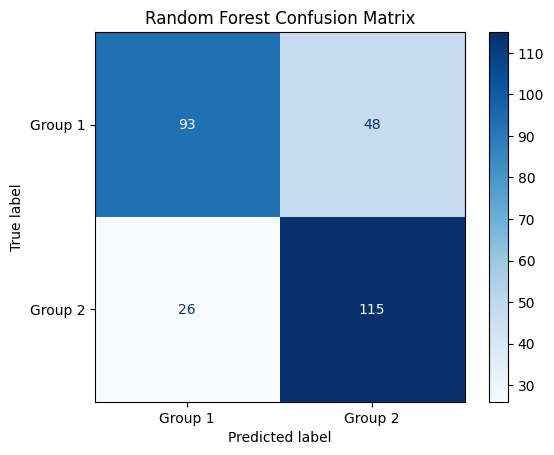

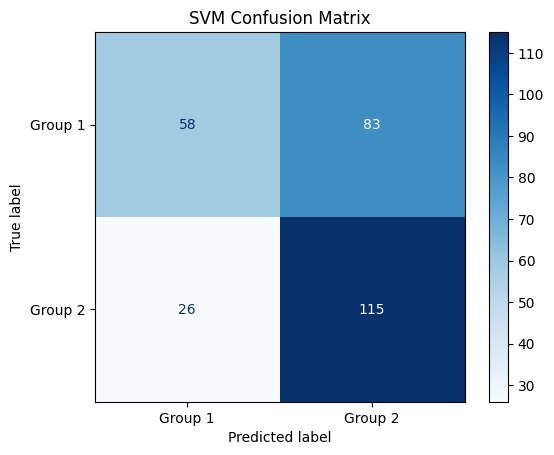

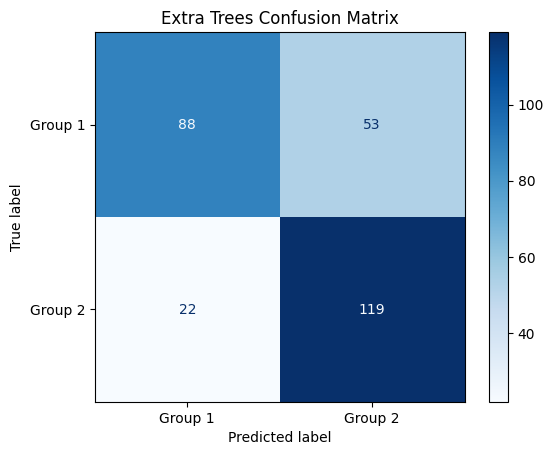

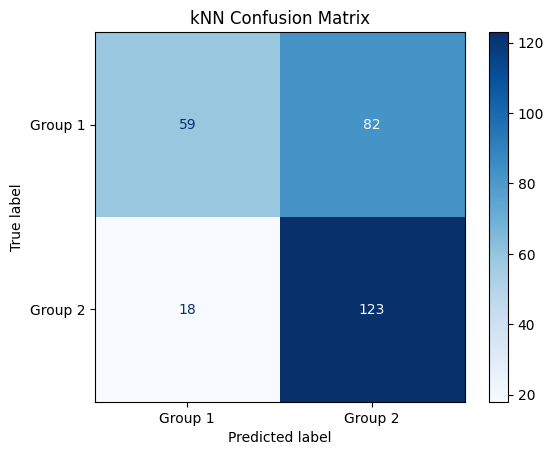

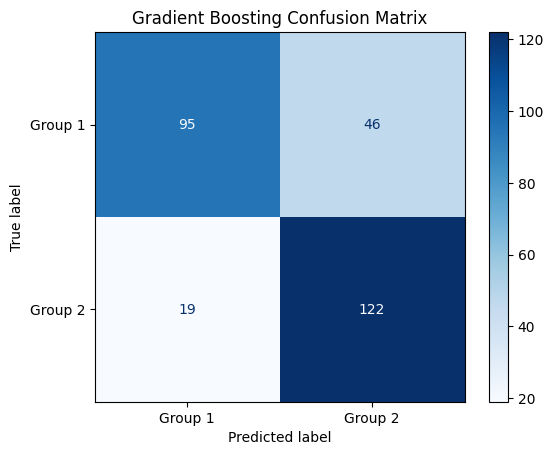

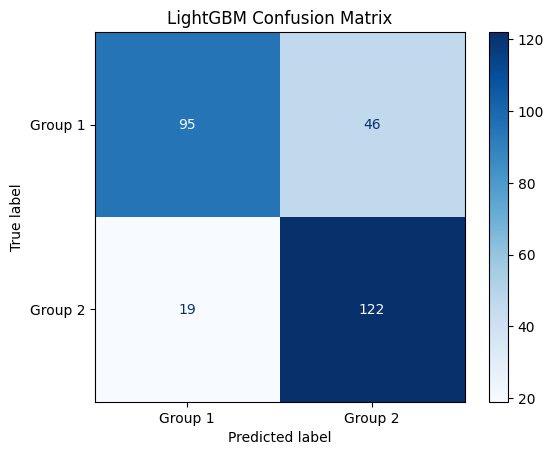

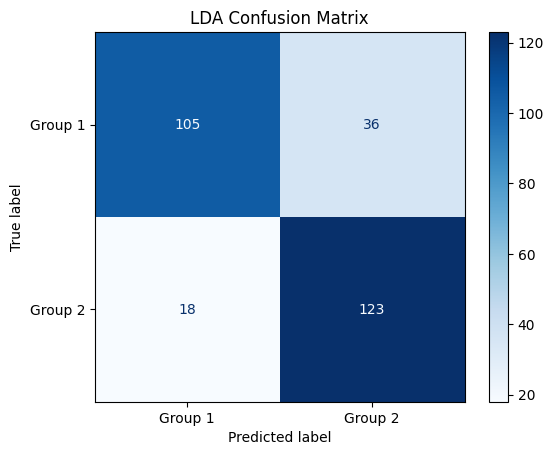

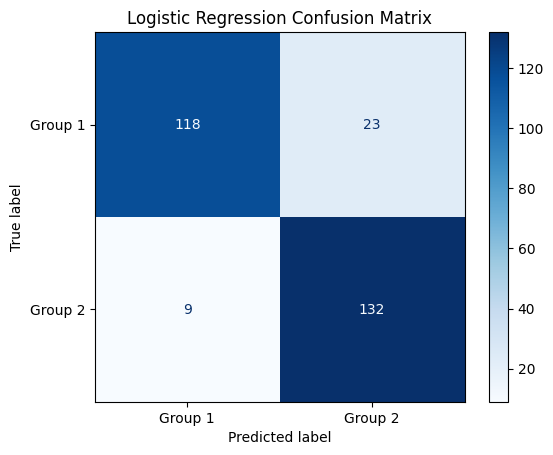

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [22]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar_reversed, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_lg_flipped, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
         Group 1  Group 2
Group 1       93       48
Group 2       26      115

SVM Confusion Matrix
         Group 1  Group 2
Group 1       58       83
Group 2       26      115

Extra Trees Confusion Matrix
         Group 1  Group 2
Group 1       88       53
Group 2       22      119

kNN Confusion Matrix
         Group 1  Group 2
Group 1       59       82
Group 2       18      123

Gradient Boosting Confusion Matrix
         Group 1  Group 2
Group 1       95       46
Group 2       19      122

LightGBM Confusion Matrix
         Group 1  Group 2
Group 1       95       46
Group 2       19      122

LDA Confusion Matrix
         Group 1  Group 2
Group 1      105       36
Group 2       18      123

Logistic Regression Confusion Matrix
         Group 1  Group 2
Group 1      118       23
Group 2        9      132



Classification Report

In [23]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_lda_logo_reversed, "Linear Discriminant Analysis")
display_classification_report(report_logreg_flipped, "Logistic Regression")


Classification Report for Random Forest
Class: Group 1
precision: 0.7815126050420168
recall: 0.6595744680851063
f1-score: 0.7153846153846154
support: 141.0

Class: Group 2
precision: 0.7055214723926381
recall: 0.8156028368794326
f1-score: 0.756578947368421
support: 141.0

accuracy: 0.7375886524822695

Class: macro avg
precision: 0.7435170387173274
recall: 0.7375886524822695
f1-score: 0.7359817813765182
support: 282.0

Class: weighted avg
precision: 0.7435170387173274
recall: 0.7375886524822695
f1-score: 0.7359817813765183
support: 282.0

Classification Report for SVM
Class: Group 1
precision: 0.6904761904761905
recall: 0.41134751773049644
f1-score: 0.5155555555555555
support: 141.0

Class: Group 2
precision: 0.5808080808080808
recall: 0.8156028368794326
f1-score: 0.6784660766961652
support: 141.0

accuracy: 0.6134751773049646

Class: macro avg
precision: 0.6356421356421356
recall: 0.6134751773049645
f1-score: 0.5970108161258604
support: 282.0

Class: weighted avg
precision: 0.635642135

AIO Classifiers

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'dgp_name'
features_v0u = df_smoothed_v0w.columns.difference(['dgp_name', 'prov_char'])
X = df_smoothed_v0w[features_v0u]
y = df_smoothed_v0w[target_v0u]
groups = df_smoothed_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Function to evaluate a classifier using LOGO-CV
def evaluate_classifier(clf, classifier_name):
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in logo.split(X, y_encoded, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Fit the model
        clf.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = clf.predict(X_test)

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate the overall accuracy
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)
    print(f'Leave-One-Group-Out CV - Overall Test Accuracy for {classifier_name}: {overall_accuracy}')

    # Generate the classification report for the overall test predictions
    report = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
    print(f"Leave-One-Group-Out CV {classifier_name} Model Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
    print(f"Confusion Matrix for {classifier_name}:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()

In [25]:
# Initialize classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', C=1, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
lda = LinearDiscriminantAnalysis()
logreg = LogisticRegression(random_state=42)

# Evaluate each classifier
evaluate_classifier(rf, "Random Forest")
evaluate_classifier(svm, "SVM")
evaluate_classifier(et, "Extra Trees")
evaluate_classifier(knn, "k-Nearest Neighbors")
evaluate_classifier(gbc, "Gradient Boosting Classifier")
evaluate_classifier(lda, "Linear Discriminant Analysis")
evaluate_classifier(logreg, "Logistic Regression")

Leave-One-Group-Out CV - Overall Test Accuracy for Random Forest: 0.7375886524822695
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.78      0.66      0.72       141
     Group 2       0.71      0.82      0.76       141

    accuracy                           0.74       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.74      0.74      0.74       282

Confusion Matrix for Random Forest:
         Group 1  Group 2
Group 1       93       48
Group 2       26      115
Class: Group 1
precision: 0.7815126050420168
recall: 0.6595744680851063
f1-score: 0.7153846153846154
support: 141.0

Class: Group 2
precision: 0.7055214723926381
recall: 0.8156028368794326
f1-score: 0.756578947368421
support: 141.0

accuracy: 0.7375886524822695

Class: macro avg
precision: 0.7435170387173274
recall: 0.7375886524822695
f1-score: 0.7359817813765182
support: 282.0

Class: weighted avg
precisi